### könyvtárak importálása 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

### DataFrame importálása

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.dropna(inplace=True)

### Scatter plot (GDP - Life expectancy)

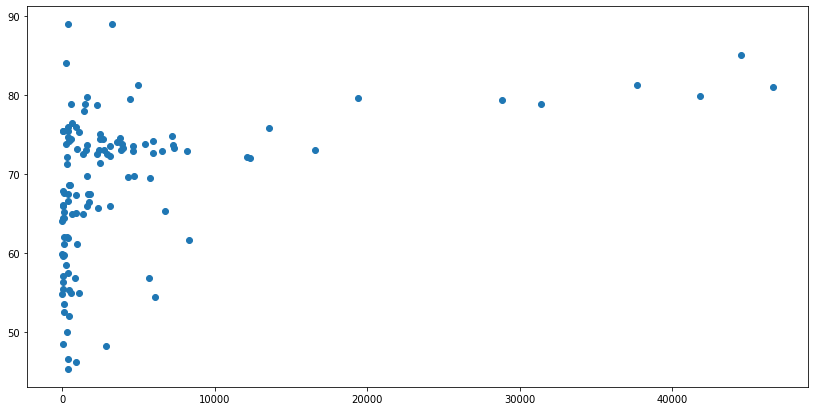

In [5]:
plt.figure(figsize=(14, 7))
plt.scatter(df[df.Year == 2007]['GDP'], df[df.Year == 2007]['Life expectancy '])

### K-means cluster - Sklearn

In [7]:
from sklearn.cluster import KMeans

X = np.array(df[df.Year == 2007].loc[:, ['GDP', 'Life expectancy ']])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### klaszterek ábrázolása középpontokkal (Matplotlib)

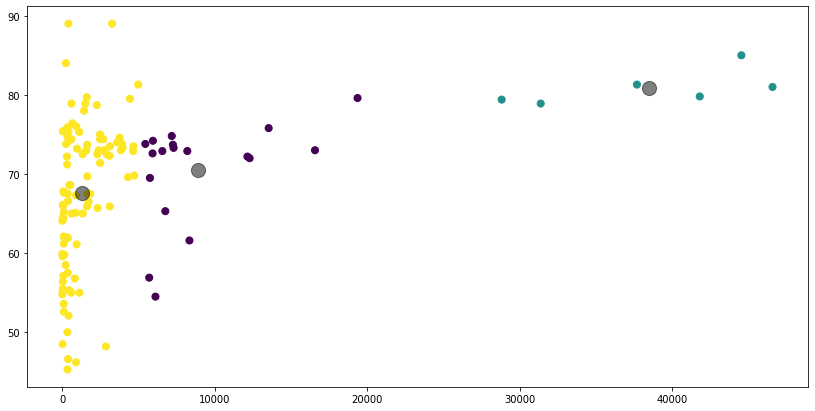

In [8]:
plt.figure(figsize=(14, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [9]:
X = pd.DataFrame(X, columns=['GDP', 'Life_expectancy'])

In [10]:
cen = pd.DataFrame(centers, columns=['x', 'y'])
cen

,x,y
0,8922.240313,70.477778
1,38476.457190,80.900000
2,1338.652190,67.571875


### Klaszterek ábrázolása középpontokkal (Plotly)

In [38]:
import plotly.express as px

fig = px.scatter(X, 'GDP', 'Life_expectancy', color=y_kmeans, hover_name=df[df.Year==2007].Country,
                 color_continuous_scale=px.colors.sequential.Viridis)

fig2 = px.scatter(cen, 'x', 'y')
fig.add_trace(fig2.data[0])

fig.show()

### Klaszterek ábrázolása középpontokkal (Plotly)

In [77]:
import plotly.graph_objects as go

fig = go.Figure()

fig = go.Figure(data=go.Scatter(x = X['GDP'], y = X['Life_expectancy'],
                    mode='markers',
                    name='Countries',
                    marker=dict(size=7, color=y_kmeans),
                    text=df['Country'])
)

fig.add_trace(go.Scatter(
    x=cen['x'], y=cen['y'],
    mode='markers',
    name='Centers',
    marker=dict(size=15, color='black', opacity=0.6))
)

fig.show()